# Lektion 14 - Advanced Data Visualization with Seaborn

## Syfte och mål
This lesson builds on the Matplotlib foundation (L13) by introducing Seaborn, a high-level library specializing in statistical data visualization. The goal is to efficiently create complex, insightful plots (like heatmaps, boxplots, and distributions) to quickly identify relationships, patterns, and anomalies during Exploratory Data Analysis (EDA).

## Learning Objectives
- Understand the relationship between Seaborn and Matplotlib
- Create distribution plots using `displot` and `histplot`
- Build relational and categorical plots with `scatterplot` and `catplot`
- Generate correlation heatmaps for multivariate analysis
- Apply the `hue` parameter for multi-dimensional visualization


## Pre-class Reading

### Korta läshänvisningar:
- **Seaborn vs. Matplotlib**: [How to choose between Seaborn vs Matplotlib](https://www.newhorizons.com/resources/blog/how-to-choose-between-seaborn-vs-matplotlib)
- **Distribution Plots**: [Seaborn Distribution Plots Tutorial](https://www.geeksforgeeks.org/machine-learning/seaborn-distribution-plots/)

### Fördjupning / Längre läshänvisningar:
- **Relational and Categorical Plots**: [Relational Plots in Seaborn](https://www.geeksforgeeks.org/machine-learning/relational-plots-in-seaborn-part-i/)
- **Heatmaps and Correlation**: [Seaborn Heatmaps Tutorial](https://www.datacamp.com/tutorial/seaborn-heatmaps)

### Videos:
- Seaborn Crash Course: Common plot types (boxplot, violinplot)
- Multi-Variate Visualization: Using hue and col parameters


## Classroom Activities

### Aktivitet 1: Discussion - Choosing the Right Plot (15 min)

**Questions:**
- "When would you choose a boxplot over a histogram to show the distribution of a feature?"
- "How does the hue parameter in Seaborn allow you to visualize three dimensions of data in a 2D plot?"

### Aktivitet 2: Lab - Correlation and Distribution Analysis

We'll work together on a large, publicly available dataset to practice core EDA visualizations.


In [96]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [97]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(sns.__version__)

0.13.2


In [98]:
df = sns.load_dataset("iris")

In [99]:
# 2. Data Inspection
print("Dataset Info:")
df.info()
print("\nDataset Description:")
df.describe()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Dataset Description:


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Univariate Analysis: Distribution Plots


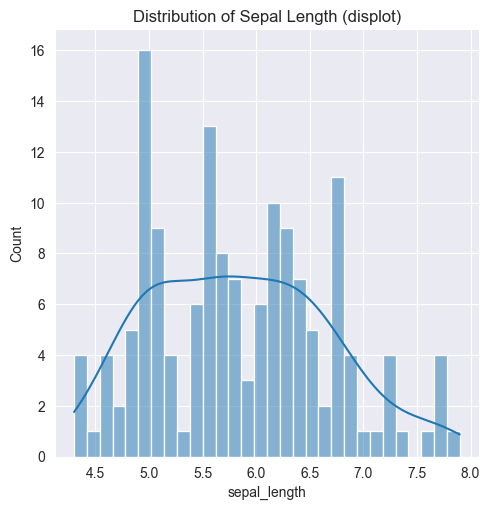

In [100]:
# Alternative: Using displot for more flexibility

# Displot can plot distributions in many ways, including histograms, KDEs, and more
# in general, displot is more flexible than histplot
# but for histograms, histplot is often the better choice
sns.displot(df, x='sepal_length', kde=True, bins=30)
plt.title('Distribution of Sepal Length (displot)')
plt.show()


#### Bivariate Analysis: Categorical Relationships


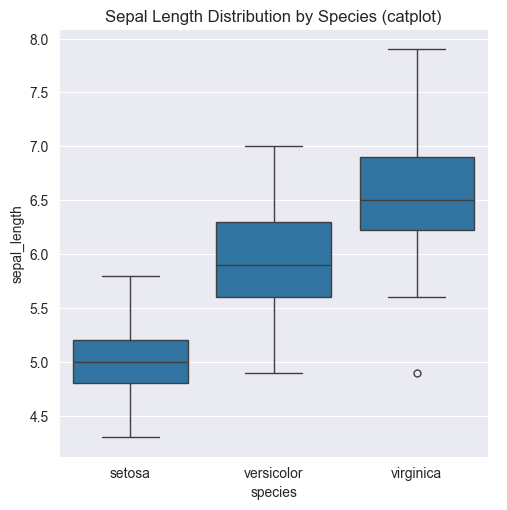

In [101]:
# Alternative: Using catplot for more complex categorical analysis
sns.catplot(data=df, x='species', y='sepal_length', kind='box')
plt.title('Sepal Length Distribution by Species (catplot)')
plt.show()


#### Multivariate Analysis: Correlation Heatmap


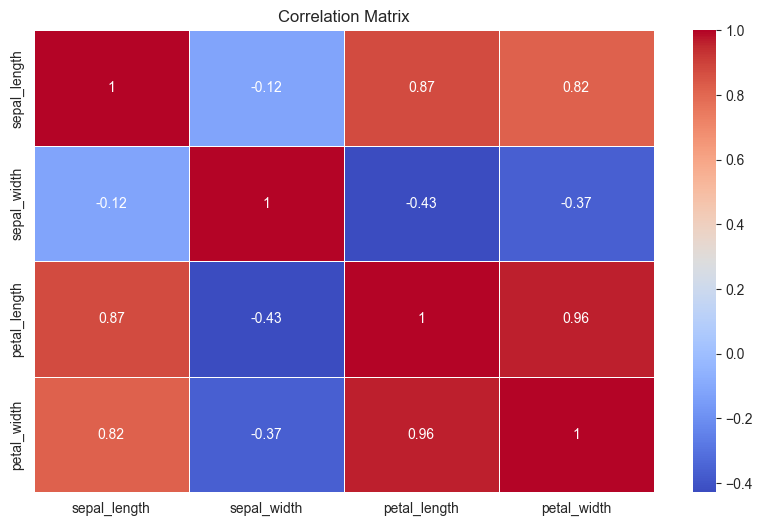

In [102]:
# 4. Visualize Correlation (Multivariate)

# in our correlation matrix we can see how strongly different numerical features are correlated
# Correlation values range from -1 to 1
# 1 means perfect positive correlation (as one variable increases, so does the other)
# -1 means perfect negative correlation (as one variable increases, the other decreases)
# 0 means no correlation

# Very strong correlations might need special handling in machine learning models
corr_matrix = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


### Additional Seaborn Plot Types


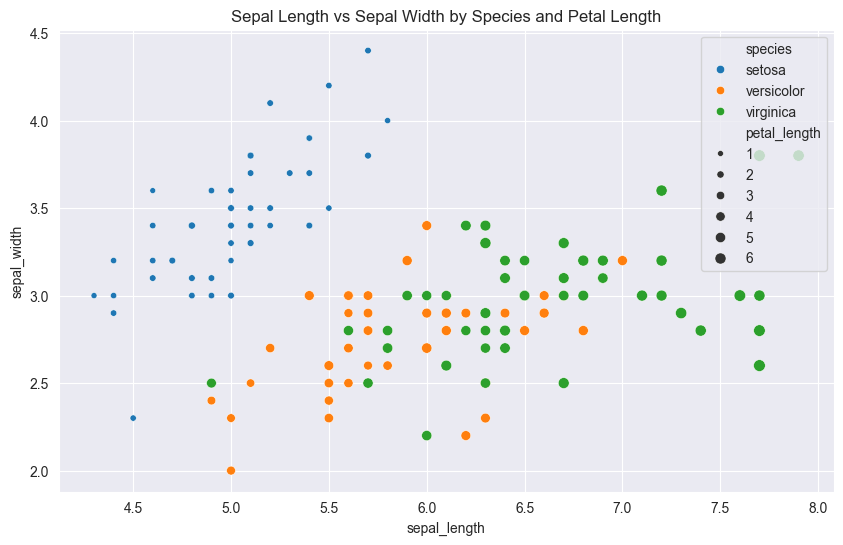

In [103]:
# Scatter plot with hue for multi-dimensional analysis
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue="species", size='petal_length')
plt.title('Sepal Length vs Sepal Width by Species and Petal Length')
plt.show()


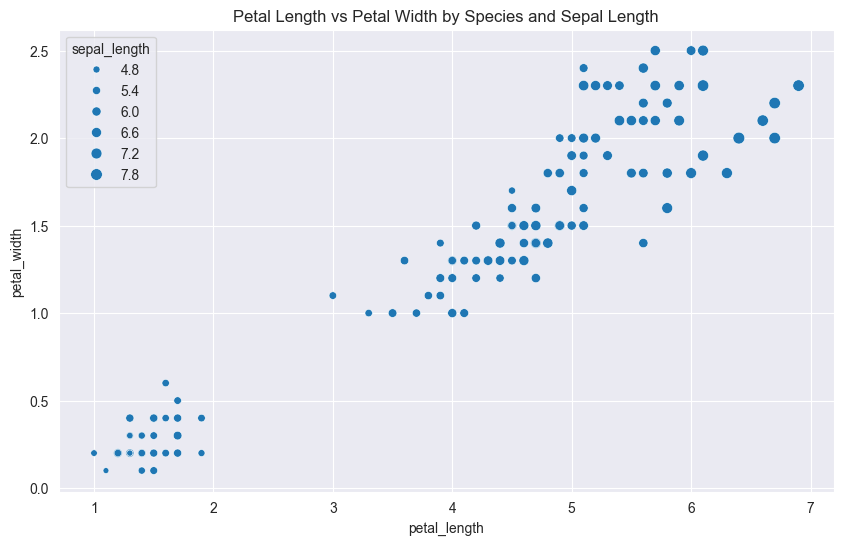

In [107]:
# Scatter plot with hue for multi-dimensional analysis
sns.scatterplot(data=df, x='petal_length', y='petal_width', size='sepal_length')
plt.title('Petal Length vs Petal Width by Species and Sepal Length')
plt.show()

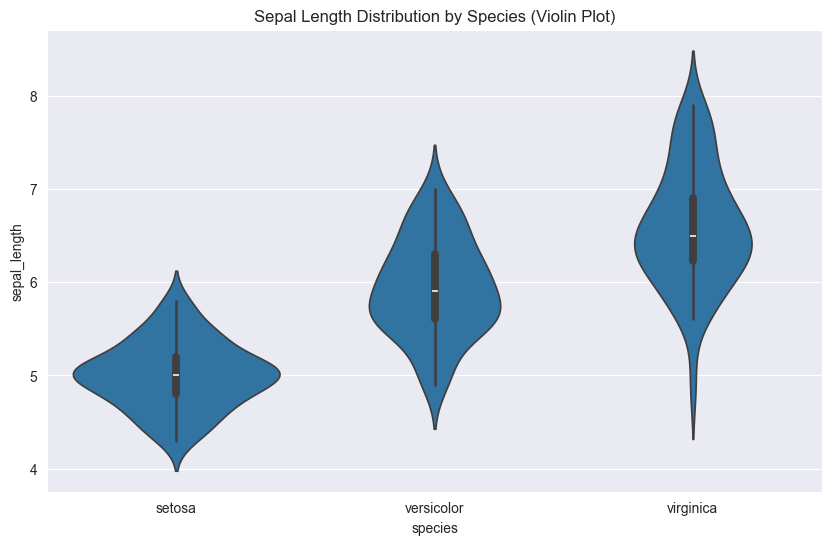

In [105]:
# Violin plot for distribution comparison

# Violin plot vs box plot:
# - Violin plots show the full distribution of the data (like a rotated KDE)
# - Box plots summarize the distribution with quartiles and median
sns.violinplot(data=df, x='species', y='sepal_length')
plt.title('Sepal Length Distribution by Species (Violin Plot)')
plt.show()


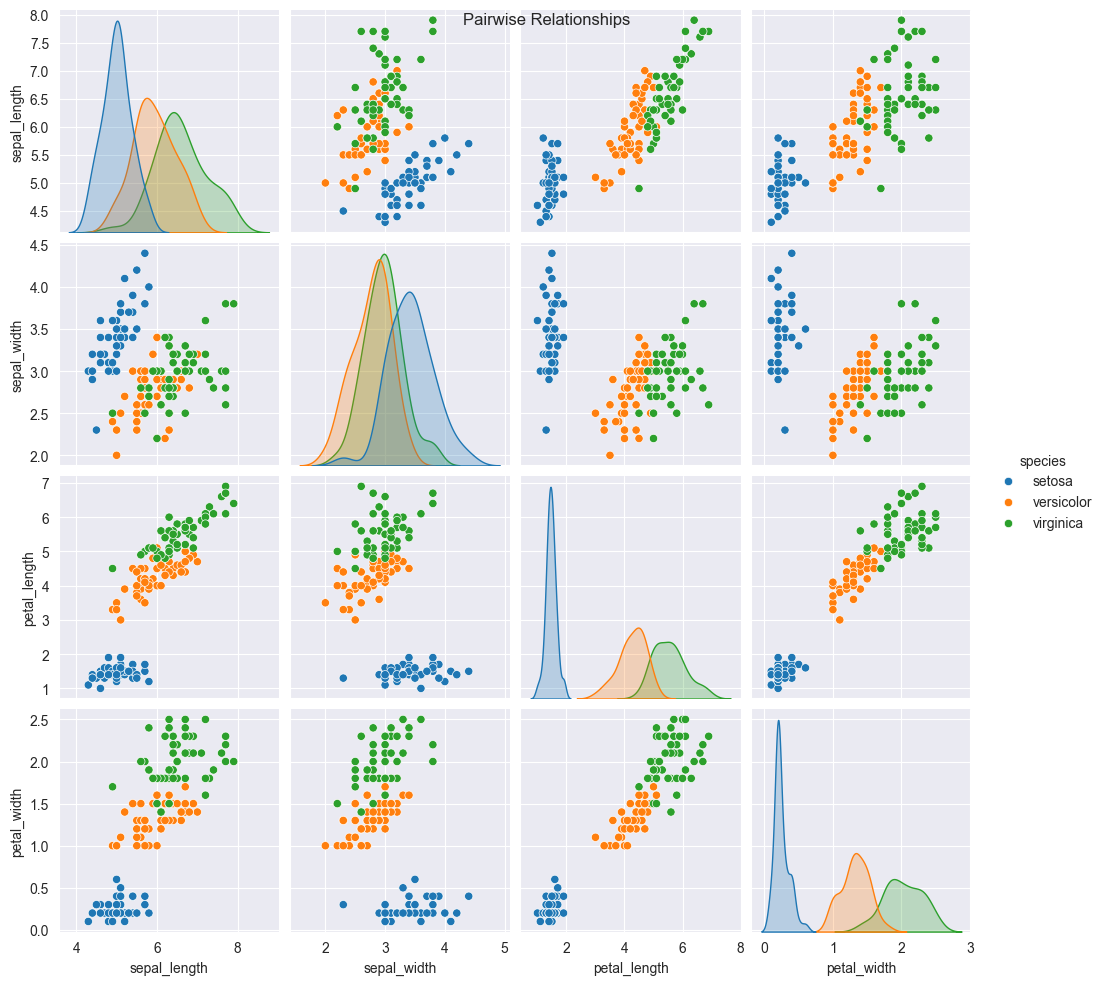

In [106]:
# In seaborn there's a very handy function called pairplot
# It creates a matrix of scatter plots for each pair of numerical features
# along with histograms or KDEs on the diagonal

# Pair plot for comprehensive analysis
sns.pairplot(df, hue='species')
plt.suptitle('Pairwise Relationships')
plt.show()


## Assignment
**Complete the L14_assignment.py** - This assignment provides hands-on practice with the penguins dataset, including:
- Data exploration and basic statistics
- Univariate analysis with distribution plots
- Bivariate analysis with scatter plots and boxplots
- Multivariate analysis with correlation heatmaps and pair plots
- Advanced visualizations with multiple dimensions
- Insights and conclusions based on visualizations


## Key Takeaways

1. **Seaborn vs Matplotlib**: Seaborn provides high-level statistical plotting functions built on top of Matplotlib
2. **Distribution Analysis**: Use `histplot` and `displot` for univariate distribution analysis
3. **Categorical Analysis**: `boxplot` and `catplot` are excellent for comparing groups
4. **Multivariate Analysis**: `heatmap` for correlations, `scatterplot` with `hue` for multi-dimensional relationships
5. **The `hue` parameter**: Allows you to add a third dimension to 2D plots by coloring points/lines by a categorical variable

## Next Steps
- Practice with your own datasets
- Experiment with different Seaborn plot types
- Combine multiple plots for comprehensive EDA
- Move on to Lesson 15: Feature Engineering
